## Libraries

In [1]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

%matplotlib inline

# Image opening and resizing 

In [12]:
img = cv2.imread('clg.jpg',cv2.IMREAD_UNCHANGED)
print("org dim ",img.shape)
scale_percent = 30
width = int(img.shape[1]*scale_percent/100)
height = int(img.shape[0]*scale_percent/100)
dim = (width,height)

resized = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
print("Resized dimension :",resized.shape)


org dim  (1849, 3797, 3)
Resized dimension : (554, 1139, 3)


In [13]:
cv2.imshow("res image",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Face detection

In [14]:
face = cv2.CascadeClassifier('haarcascade-frontalface.xml')

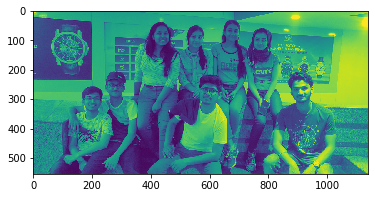

In [15]:
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [16]:
faces = face.detectMultiScale(gray, 1.3, 5)


In [17]:
if faces is ():
    print(" NO FACE DETECTED ! ")


In [42]:
def detect_faces(fix_img,counter):
    
    face_rects = face.detectMultiScale(fix_img)
    
    for (x,y,w,h) in faces:
        counter+=1
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.rectangle(fix_img,(x,y),(x+w,y+h),(255,255,255),2)
    cv2.destroyAllWindows()
    return fix_img,counter

In [43]:

counter = 0 
result1,result2 = detect_faces(gray,counter)

#plt.imshow(result)
cv2.imshow("final image",result1)
print("Count :",result2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Count : 7


# Eye detection


In [12]:
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')

In [10]:
def detect_eyes(fix_img):
    eye_rects = eye_classifier.detectMultiScale(fix_img)
    
    for (x,y,w,h) in eye_rects:
        cv2.rectangle(fix_img,(x,y),(x+w,y+h),(255,255,255),2)
    
    cv2.destroyAllWindows()
    return fix_img

In [11]:
result = detect_eyes(gray)
#plt.imshow(result)
cv2.imshow("final image",result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Face and eye detection

In [20]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

%matplotlib inline

In [21]:
img = cv2.imread('clg.jpg',cv2.IMREAD_UNCHANGED)
print("org dim ",img.shape)
scale_percent = 30
width = int(img.shape[1]*scale_percent/100)
height = int(img.shape[0]*scale_percent/100)
dim = (width,height)

resized = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
print("Resized dimension :",resized.shape)


org dim  (1849, 3797, 3)
Resized dimension : (554, 1139, 3)


In [22]:
cv2.imshow("res image",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
face = cv2.CascadeClassifier('haarcascade-frontalface.xml')
eye_classifier = cv2.CascadeClassifier('haarcascade_eye.xml')

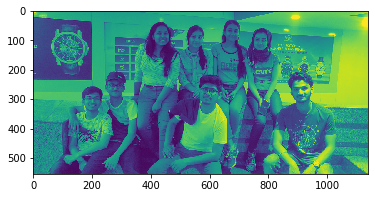

In [24]:
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [25]:
faces = face.detectMultiScale(gray, 1.3, 5)


In [26]:
if faces is ():
    print(" NO FACE DETECTED ! ")
    

In [27]:
def detect_face_eyes(fix_img):
        face_rects = face.detectMultiScale(fix_img)
        for (x,y,w,h) in face_rects:
            cv2.rectangle(fix_img,(x,y),(x+w,y+h),(255,255,255),5)
    
   
            eye_rects = eye_classifier.detectMultiScale(fix_img)
    
            for (ix,iy,iw,ih) in eye_rects:
                cv2.rectangle(fix_img,(ix,iy),(ix+iw,iy+ih),(0,0,0),2)
    
        cv2.destroyAllWindows()
        return fix_img

In [28]:
result = detect_face_eyes(gray)
#plt.imshow(result)
cv2.imshow("final image",result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# people 

In [2]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
vid = cv2.VideoCapture('running.mp4')

In [3]:
body_classifier = cv2.CascadeClassifier('haarcascade_fullbody.xml')

In [4]:
while vid.isOpened():
    ret,frame = vid.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    body = body_classifier.detectMultiScale(gray,1.2,3)
    
    if ret == True:
        for (x,y,w,h) in body:
            
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,255,255),5)
            cv2.imshow("People",frame)
            
        if cv2.waitKey(1)==13:
            cv2.destroyAllWindows()
            break
    else:
        cv2.destroyAllWindows()
        break
vid.release()

cv2.destroyAllWindows


247


## CARS

In [11]:
vid = cv2.VideoCapture('cars2.avi')

In [12]:
car_classifier = cv2.CascadeClassifier('haarcascade_car.xml')

In [13]:
 
while vid.isOpened():
    ret,frame = vid.read()
    
    cars = car_classifier.detectMultiScale(frame,1.3,2)
    
    if ret == True:
        for (x,y,w,h) in cars:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(111,111,110),5)
            
            cv2.imshow("cars",frame)
            
        if cv2.waitKey(1)==13:
            cv2.destroyAllWindows()
            break
    else:
        cv2.destroyAllWindows()
        break
vid.release()
cv2.destroyAllWindows


<function destroyAllWindows>

## mouth detection 


In [19]:
img = cv2.imread('M.jpeg',cv2.IMREAD_UNCHANGED)
print("org dim ",img.shape)
scale_percent = 30
width = int(img.shape[1]*scale_percent/100)
height = int(img.shape[0]*scale_percent/100)
dim = (width,height)

resized = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
print("Resized dimension :",resized.shape)


org dim  (1280, 960, 3)
Resized dimension : (384, 288, 3)


In [20]:
cv2.imshow("G",resized)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [21]:
mouth_classifier = cv2.CascadeClassifier('haarcascade_mouth.xml')

In [22]:
if mouth_classifier.empty():
    print("NO Mouth Detected !")

In [23]:
mouth = mouth_classifier.detectMultiScale(resized,1.3,5)

In [24]:
def detect_mouth(fix_img):
    
    
    for (x,y,w,h) in mouth:
        cv2.rectangle(fix_img,(x,y),(x+w,y+h),(255,255,255),2)
    
    cv2.destroyAllWindows()
    return fix_img

In [25]:
m = detect_mouth(resized)
cv2.imshow("mouth",m)
cv2.waitKey(0)
cv2.destroyAllWindows()

## license plate detection

In [9]:
img = cv2.imread('car.jpg')

In [15]:
def plate_detector(img):
    plate_img = img.copy()
    car_classifier = cv2.CascadeClassifier('haarcascade_carplate.xml')
    
    plate_rects = car_classifier.detectMultiScale(plate_img,1.3,7)
    
    
    for (x,y,w,h) in plate_rects:
        a,b = (int(0.02*img.shape[0]), int(0.025*img.shape[1]))
        plate = plate_img[y+a:y+h-a, x+b:x+w-b, :]
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(255,0,0),5)
    
    return plate_img

In [16]:
res = plate_detector(img)
cv2.imshow("car",res)
cv2.waitKey(0)
cv2.destroyAllWindows()